In [1]:
import json
import time
from base64 import b64decode
from io import BytesIO, StringIO
from IPython import get_ipython
from IPython.core.magic import register_cell_magic
from IPython.utils.capture import capture_output
from IPython.core.interactiveshell import InteractiveShell

from manim import *
params = f" -v WARNING -r {80*4},{40*4} -s  --disable_caching Example"
import PIL


@register_cell_magic
def capture_png(line, cell):

    # init capturing cell output
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )
    argument_array = line.split('--style')
    path = argument_array[0].strip()
  #  path = path.split(".png")[0] + str(time.time_ns()) + ".png" time stemps not needed
    if not path:
        raise ValueError('No path found!')

    style = str(*argument_array[1:])
    style = style.strip()
    style = style.strip('"')  # remove quotes

    default_style = ""

    style = default_style + style

    raw_code_block = cell
    code_block = ""

    for codeline in StringIO(raw_code_block):
        if "#NOT" in codeline:
            pass
        else:
            code_block += codeline
    
    new_codeblock = ""
    for codeline in StringIO(code_block):
        if "#ONLY" in codeline:
            codeline= codeline.replace("#ONLY", "") 
            if codeline.startswith("        "): # delete the indention for manim -> TODO this can be made prettier!
                codeline = codeline[8:]

            new_codeblock += codeline
        else:
            pass
    
    if new_codeblock: # checks if there are lines that include "#ONLY"
        code_block = new_codeblock

    code_block = code_block.replace("'", "&#39;") # make sure that javascript can read the single quote character
    code_block = code_block.strip("\n")

    with open(joson_file_path, "r") as jsonFile:
            data = json.load(jsonFile)

    if not chapter_name in data:
        data[chapter_name] = []

    chapter_content = data[chapter_name]
    chapter_content.append(
        {"image_path": path,
        "celltype": "Normal",
        "css": style,
        "code": code_block})

    data[chapter_name] = chapter_content
    with open(joson_file_path, "w") as jsonFile:
        json.dump(data, jsonFile, indent=2, sort_keys=False)

    shell = InteractiveShell.instance()
    # save the output
    with capture_output(stdout=False, stderr=False, display=True) as result:
        shell.run_cell(cell) # idea by @krassowski 

    # save image
    for output in result.outputs:
        display(output)
        data = output.data
        if 'image/png' in data:
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')

joson_file_path = "imgs/gallery_parameters.json"
chapter_name = "Camera and Style"


Manim Community v0.14.0

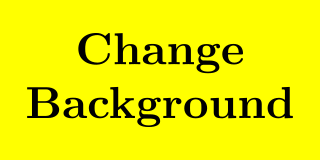

In [2]:
%%capture_png imgs/Background.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        self.camera.background_color = YELLOW #ONLY
        mob = Tex(r"\textbf{Change \\ Background}", color=BLACK)
        self.add(mob)
        self.camera.frame.scale(1/4)

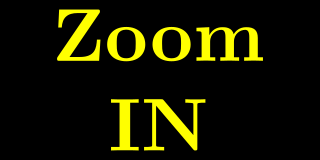

In [3]:
%%capture_png imgs/ZoomIN.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Tex(r"\textbf{Zoom \\ IN}", color=YELLOW)
        #needs ZoomedScene #ONLY
        self.camera.frame.scale(0.6) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/4)

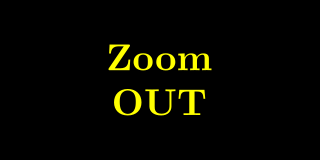

In [4]:
%%capture_png imgs/ZoomOUT.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Tex(r"\textbf{Zoom \\ OUT}", color=YELLOW)
        # needs ZoomedScene #ONLY
        self.camera.frame.scale(1.2) #ONLY

        self.add(mob)
        self.camera.frame.scale(1/4)

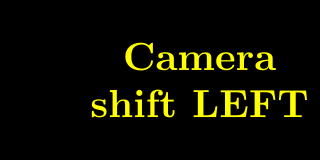

In [5]:
%%capture_png imgs/CameraLEFT.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Tex(r"\textbf{Camera \\ shift LEFT}", color=YELLOW)
        # needs ZoomedScene #ONLY
        self.camera.frame.shift(LEFT*0.5) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/3.5)

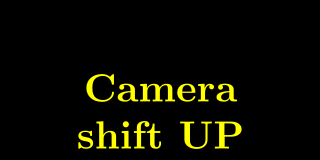

In [6]:
%%capture_png imgs/CameraUP.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Tex(r"\textbf{Camera \\ shift UP}", color=YELLOW)
        # needs ZoomedScene #ONLY
        self.camera.frame.shift(UP*0.4) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/3.5)

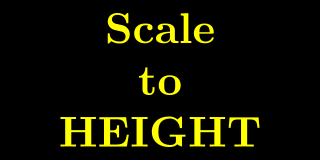

In [7]:
%%capture_png imgs/MatchHEIGHT.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Tex(r"\textbf{Scale \\ to \\ HEIGHT}", color=YELLOW)
        self.add(mob)
        # needs ZoomedScene #ONLY
        self.camera.frame.height =  mob.height + 3*SMALL_BUFF #ONLY

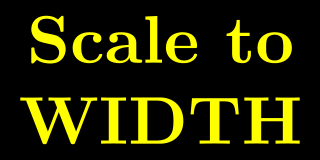

In [8]:
%%capture_png imgs/MatchWIDTH.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Tex(r"\textbf{Scale to  \\ WIDTH}", color=YELLOW)
        self.add(mob)
        # needs ZoomedScene #ONLY
        self.camera.frame.width =  mob.width + 3*SMALL_BUFF  #ONLY

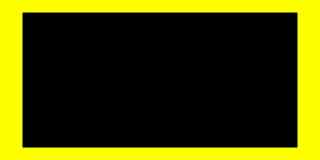

In [9]:
%%capture_png imgs/FullScreenRectangle.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = FullScreenRectangle(stroke_width=200, color= YELLOW) #ONLY
        self.add(mob)

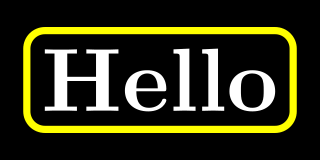

In [10]:
%%capture_png imgs/SurroundingRectangle.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        inner = Tex(r"\textbf{Hello}", color=WHITE) #ONLY
        mob = SurroundingRectangle(inner, corner_radius=0.1) #ONLY
        self.add(mob,inner)
        self.camera.frame.scale(1/8)

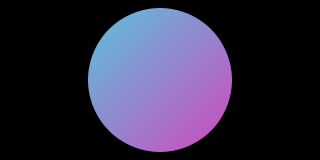

In [11]:
%%capture_png imgs/Dot_set_color_by_gradient.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Dot(radius=2.0)  #ONLY
        mob.set_color_by_gradient([PINK, BLUE]) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/1.6)

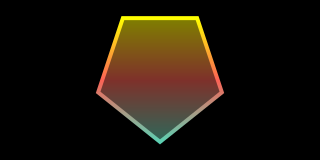

In [12]:
%%capture_png imgs/Polygon_set_color.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Polygon([-1, .5, 0], [-.5, 2, 0], [1, 2, 0], [1.5, .5, 0], [.25, -.5, 0], sheen_direction = UP) #ONLY
        mob.set_fill(opacity=.5) #ONLY
        mob.set_color([TEAL, RED, YELLOW]) #ONLY
        mob.set_stroke(width=8) #ONLY
        mob.move_to(ORIGIN) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/2.2)